In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly import tools
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn.model_selection import train_test_split
%matplotlib inline

df = pd.read_csv('bank-full.csv')
df_original = df.copy()
class_mapping = {label: idx for idx,label in enumerate(np.unique(df['y']))}
df['y'] = df['y'].map(class_mapping)
df_treino,df_teste = train_test_split(df,test_size = 0.2, random_state=42)
df_treino.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3344,41,blue-collar,married,primary,no,849,yes,no,unknown,15,may,72,1,-1,0,unknown,0
17965,49,technician,married,primary,no,1415,yes,no,cellular,30,jul,269,2,-1,0,unknown,0
18299,42,admin.,married,secondary,no,3842,no,no,cellular,31,jul,130,4,-1,0,unknown,0
10221,37,management,single,tertiary,no,-119,yes,no,unknown,11,jun,375,11,-1,0,unknown,0
32192,56,blue-collar,married,primary,no,3498,no,no,cellular,15,apr,264,2,-1,0,unknown,1


In [2]:
df_treino.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000
mean,40.930823,1361.046146,15.817739,256.891202,2.765649,40.180076,0.580264,0.116069
std,10.618369,3023.083187,8.325860,256.884103,3.120193,100.107617,2.370668,0.320313
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,70.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,447.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1429.000000,21.000000,318.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [3]:
df_treino.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,poutcome
count,36168,36168,36168,36168,36168,36168,36168,36168,36168
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,7806,21804,18670,35491,20135,30333,23464,10963,29560


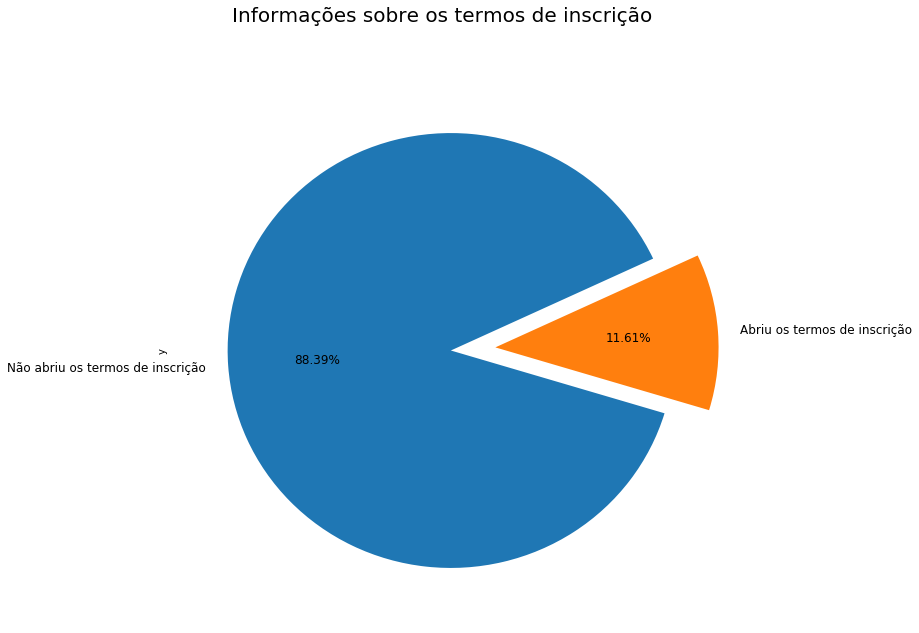

In [4]:
fig1, ax1 = plt.subplots(figsize=(10,10))

labels = 'Não abriu os termos de inscrição', 'Abriu os termos de inscrição'
plt.suptitle('Informações sobre os termos de inscrição', fontsize=20)

df_treino['y'].value_counts().plot.pie(explode = [0, 0.2],autopct='%1.2f%%', ax = ax1, labels=labels, fontsize=12, startangle=25)
plt.show()

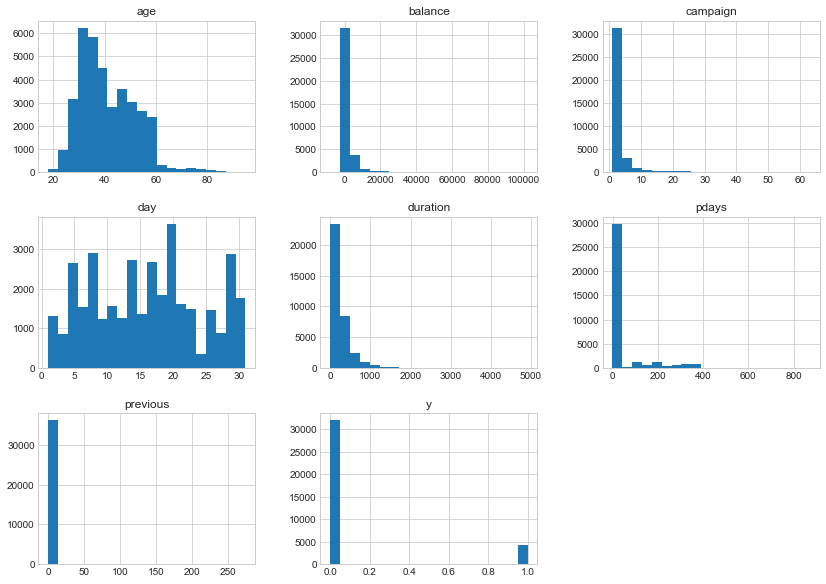

In [5]:
plt.style.use('seaborn-whitegrid')

df_treino.hist(bins=20, figsize=(14,10))
plt.show()

In [6]:
df_treino[["job", "y"]].groupby(['job'], as_index=False).mean().sort_values(by='y', ascending=False)

,job,y
8,student,0.278976
5,retired,0.222590
10,unemployed,0.160313
4,management,0.135467
6,self-employed,0.122862
0,admin.,0.119894
11,unknown,0.111588
9,technician,0.108760
3,housemaid,0.093812
7,services,0.090746


In [7]:
df_treino["Job"] = np.nan
df_teste['Job'] = np.nan
lst = [df_treino,df_teste]
for col in lst:
    col.loc[(col["job"] == 'blue-collar')|(col["job"] == 'entrepreneur')|(col["job"] == 'services'),'Job'] = "grup1"
    col.loc[(col["job"] == 'housemaid')|(col["job"] == 'technician')|(col["job"] == 'unknown'),'Job'] = "grup3"
    col.loc[(col["job"] == 'admin.')|(col["job"] == 'self-employed')|(col["job"] == 'management'),'Job'] = "grup2"
    col.loc[(col["job"] == 'unemployed')|(col["job"] == 'retired')|(col["job"] == 'student'),'Job'] = col["job"]


In [193]:
job_mapping = {'blue-collar' : 0, 'entrepreneur':1, 'services':2, 'housemaid':3,'technician':4,'unknown':5,'admin.' : 6,'self-employed' : 7,'management' : 8,'unemployed' : 9,'retired' : 10,'student' : 11}
df_treino['job'] = df_treino['job'].map(job_mapping)
df_teste['job'] = df_teste['job'].map(job_mapping)
Job_mapping = {'grup1' : 0, 'grup2':1, 'grup3':2, 'unemployed' : 3,'retired' : 4,'student' : 5}
df_treino['Job'] = df_treino['Job'].map(Job_mapping)
df_teste['Job'] = df_teste['Job'].map(Job_mapping)

In [9]:
df_treino.corr()['y'].sort_values(ascending=False)

y           1.000000
duration    0.393402
job         0.115826
Job         0.112352
pdays       0.105742
previous    0.092051
balance     0.052518
age         0.026684
day        -0.025887
campaign   -0.072571
Name: y, dtype: float64

In [10]:
df_treino[["month", "y"]].groupby(['month'], as_index=False).mean().sort_values(by='y', ascending=False)

,month,y
7,mar,0.516043
11,sep,0.465517
2,dec,0.464481
10,oct,0.437396
0,apr,0.202645
3,feb,0.156723
1,aug,0.110954
9,nov,0.101481
6,jun,0.098888
4,jan,0.098678


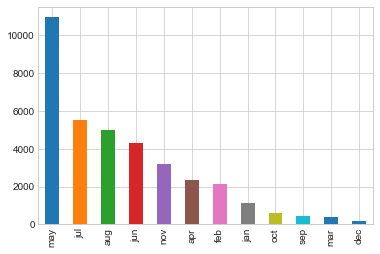

In [11]:
df_treino['month'].value_counts().plot(kind='bar')

In [12]:
df_treino[["poutcome", "y"]].groupby(['poutcome'], as_index=False).mean().sort_values(by='y', ascending=False)

,poutcome,y
2,success,0.641322
1,other,0.170341
0,failure,0.126891
3,unknown,0.090392


In [13]:
df_treino[["contact", "y"]].groupby(['contact'], as_index=False).mean().sort_values(by='y', ascending=False)

,contact,y
0,cellular,0.148270
1,telephone,0.137128
2,unknown,0.038613


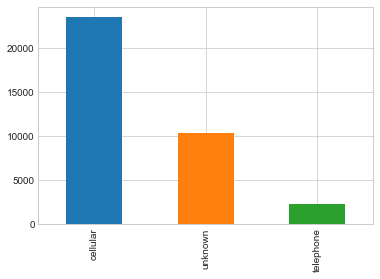

In [14]:
df_treino['contact'].value_counts().plot(kind='bar')

In [15]:
df_treino[["day", "y"]].groupby(['day'], as_index=False).mean().sort_values(by='y',ascending = False)

,day,y
0,1,0.289062
9,10,0.238443
21,22,0.179245
29,30,0.176935
3,4,0.155127
24,25,0.154887
12,13,0.148060
11,12,0.147128
2,3,0.144354
14,15,0.143377


In [16]:
df_treino[["education", "y"]].groupby(['education'], as_index=False).mean().sort_values(by='y', ascending=False)

,education,y
2,tertiary,0.148970
3,unknown,0.127444
1,secondary,0.105303
0,primary,0.086377


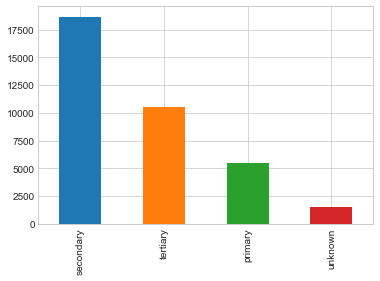

In [17]:
df_treino['education'].value_counts().plot(kind='bar')

In [18]:
tertiaty=df[df['education']=='tertiary']
secondary=df[df['education']=='secondary']
primary=df[df['education']=='primary']

In [19]:
df_treino['AgeBand'] = pd.qcut(df['age'], 10)
df_treino[["AgeBand", "y"]].groupby(['AgeBand'], as_index=False).mean().sort_values(by='y', ascending=False)

,AgeBand,y
9,"(56.0, 95.0]",0.202543
0,"(17.999, 29.0]",0.174160
3,"(34.0, 36.0]",0.110961
1,"(29.0, 32.0]",0.107584
2,"(32.0, 34.0]",0.102034
4,"(36.0, 39.0]",0.099437
8,"(51.0, 56.0]",0.091532
7,"(46.0, 51.0]",0.091436
6,"(42.0, 46.0]",0.089572
5,"(39.0, 42.0]",0.086535


In [20]:
df_treino["Age"] = np.nan
lst = [df_treino,df_teste]
for col in lst:
    col.loc[col["age"] < 30, "Age"] = "youngadult"
    col.loc[(col["age"] >= 30) & (col["age"] < 40), "Age"] = "Adult1"
    col.loc[(col["age"] >= 40) & (col["age"] <= 56), "Age"] = "Adult2"
    col.loc[col["age"] > 56, "Age"] = "Old"


In [21]:
df_treino["Age"].isnull().sum()

0

In [22]:
df_treino[["Age", "y"]].groupby(['Age'], as_index=False).mean().sort_values(by='y', ascending=False)

,Age,y
2,Old,0.202543
3,youngadult,0.174160
0,Adult1,0.104987
1,Adult2,0.089895


In [23]:
age_mapping = {'Adult2' : 0, 'Adult1':1, 'youngadult':2, 'Old':3}
df_treino['Age'] = df_treino['Age'].map(age_mapping)
df_teste['Age'] = df_teste['Age'].map(age_mapping)

In [24]:
df_treino[["Age", "y"]].groupby(['Age'], as_index=False).mean().sort_values(by='y', ascending=False)

,Age,y
3,3,0.202543
2,2,0.174160
1,1,0.104987
0,0,0.089895


In [25]:
df_treino.corr()['y'].sort_values(ascending=False)

y           1.000000
duration    0.393402
job         0.115826
Job         0.112352
Age         0.110191
pdays       0.105742
previous    0.092051
balance     0.052518
age         0.026684
day        -0.025887
campaign   -0.072571
Name: y, dtype: float64

In [26]:
df_treino['BalanceBand'] = pd.qcut(df['balance'], 15)
df_treino[["BalanceBand", "y"]].groupby(['BalanceBand'], as_index=False).mean().sort_values(by='y', ascending=False)

,BalanceBand,y
13,"(2814.0, 4833.0]",0.178912
12,"(1859.0, 2814.0]",0.157173
14,"(4833.0, 102127.0]",0.147919
11,"(1320.0, 1859.0]",0.141376
10,"(955.0, 1320.0]",0.132806
9,"(701.0, 955.0]",0.121787
6,"(272.0, 382.0]",0.118694
8,"(523.0, 701.0]",0.118531
7,"(382.0, 523.0]",0.118149
4,"(91.0, 175.0]",0.112616


In [27]:
df_treino["Balance"] = np.nan
df_teste['Balance'] = np.nan
lst = [df_treino,df_teste]
for col in lst:
    col.loc[col["balance"] <= 91, "Balance"] = "low"
    col.loc[(col["balance"] > 91) & (col["balance"] <= 955), "Balance"] = "medium"
    col.loc[(col["balance"] > 955) & (col["balance"] <= 1859), "Balance"] = "mediumh"
    col.loc[(col["balance"] > 1859) & (col["balance"] <= 2814), "Balance"] = "h"
    col.loc[(col["balance"] > 2814) & (col["balance"] <= 4833), "Balance"] = "H"
    col.loc[col["balance"] > 4833, "Balance"] = "High"

In [28]:
df_treino[["Balance", "y"]].groupby(['Balance'], as_index=False).mean().sort_values(by='y', ascending=False)

,Balance,y
0,H,0.178912
2,h,0.157173
1,High,0.147919
5,mediumh,0.137100
4,medium,0.115812
3,low,0.072333


In [29]:
balance_mapping = {'low' : 0, 'medium':1, 'mediumh':2, 'High':3,'h':4,'H':5}
df_treino['Balance'] = df_treino['Balance'].map(balance_mapping)
df_teste['Balance'] = df_teste['Balance'].map(balance_mapping)

In [30]:
df_treino.corr()['y'].sort_values(ascending=False)

y           1.000000
duration    0.393402
job         0.115826
Job         0.112352
Age         0.110191
pdays       0.105742
Balance     0.093879
previous    0.092051
balance     0.052518
age         0.026684
day        -0.025887
campaign   -0.072571
Name: y, dtype: float64

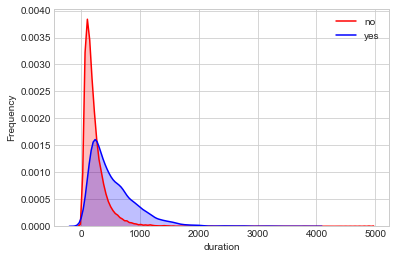

In [31]:
g = sns.kdeplot(df_treino["duration"][(df_treino["y"] == 0)], color="Red", shade = True)
g = sns.kdeplot(df_treino["duration"][(df_treino["y"] == 1)], ax =g, color="Blue", shade= True)
g.set_xlabel("duration")
g.set_ylabel("Frequency")
g = g.legend(["no","yes"])

In [32]:
df_treino[["marital", "y"]].groupby(['marital'], as_index=False).mean().sort_values(by='y', ascending=False)

,marital,y
2,single,0.147637
0,divorced,0.119720
1,married,0.100578


In [33]:
marital_mapping = {label: idx for idx,label in enumerate(np.unique(df['marital']))}
df_treino['marital'] = df_treino['marital'].map(marital_mapping)
df_teste['marital'] = df_teste['marital'].map(marital_mapping)

In [34]:
educational_mapping = {'tertiary' : 0, 'unknown':1, 'secondary':1, 'primary':3}
df_treino['education'] = df_treino['education'].map(educational_mapping)
df_teste['education'] = df_teste['education'].map(educational_mapping)

In [35]:
df_treino[["default", "y"]].groupby(['default'], as_index=False).mean().sort_values(by='y', ascending=False)

,default,y
0,no,0.117128
1,yes,0.060561


In [36]:
default_mapping = {label: idx for idx,label in enumerate(np.unique(df['default']))}
df_treino['default'] = df_treino['default'].map(default_mapping)
df_teste['default'] = df_teste['default'].map(default_mapping)

In [37]:
housing_mapping = {label: idx for idx,label in enumerate(np.unique(df['housing']))}
df_treino['housing'] = df_treino['housing'].map(housing_mapping)
df_teste['housing'] = df_teste['housing'].map(housing_mapping)

In [38]:
loan_mapping = {label: idx for idx,label in enumerate(np.unique(df['loan']))}
df_treino['loan'] = df_treino['loan'].map(loan_mapping)
df_teste['loan'] = df_teste['loan'].map(loan_mapping)

In [39]:
contact_mapping = {label: idx for idx,label in enumerate(np.unique(df['contact']))}
df_treino['contact'] = df_treino['contact'].map(contact_mapping)
df_teste['contact'] = df_teste['contact'].map(contact_mapping)

In [40]:
contact_mapping

{'cellular': 0, 'telephone': 1, 'unknown': 2}

In [41]:
month_mapping = {label: idx for idx,label in enumerate(np.unique(df['month']))}
df_treino['month'] = df_treino['month'].map(month_mapping)
df_teste['month'] = df_teste['month'].map(month_mapping)

In [42]:
poutcome_mapping = {label: idx for idx,label in enumerate(np.unique(df['poutcome']))}
df_treino['poutcome'] = df_treino['poutcome'].map(poutcome_mapping )
df_teste['poutcome'] = df_teste['poutcome'].map(poutcome_mapping )

In [43]:
poutcome_mapping

{'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}

In [44]:
df_treino[["poutcome", "y"]].groupby(['poutcome'], as_index=False).mean().sort_values(by='y', ascending=False)

,poutcome,y
2,2,0.641322
1,1,0.170341
0,0,0.126891
3,3,0.090392


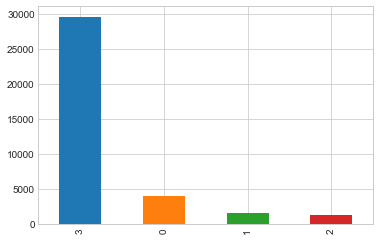

In [45]:
df_treino['poutcome'].value_counts().plot(kind='bar')

In [46]:
df_treino.corr()['y'].sort_values(ascending=False)

y            1.000000
duration     0.393402
job          0.115826
Job          0.112352
Age          0.110191
pdays        0.105742
Balance      0.093879
previous     0.092051
balance      0.052518
marital      0.043706
age          0.026684
default     -0.023934
day         -0.025887
month       -0.027406
education   -0.061245
loan        -0.066708
campaign    -0.072571
poutcome    -0.080781
housing     -0.140234
contact     -0.150066
Name: y, dtype: float64

In [47]:
df_treino['Contact']=df_treino['contact']
df_treino['Contact'].where(df_treino['Contact']==2,0,inplace=True)

In [48]:
df_treino.corr()['y'].sort_values(ascending=False)

y            1.000000
duration     0.393402
job          0.115826
Job          0.112352
Age          0.110191
pdays        0.105742
Balance      0.093879
previous     0.092051
balance      0.052518
marital      0.043706
age          0.026684
default     -0.023934
day         -0.025887
month       -0.027406
education   -0.061245
loan        -0.066708
campaign    -0.072571
poutcome    -0.080781
housing     -0.140234
contact     -0.150066
Contact     -0.153470
Name: y, dtype: float64

In [49]:
cdataset=df_treino[(df_treino['poutcome']==0)|(df_treino['poutcome']==1)|(df_treino['poutcome']==2)]
cpredict=df_treino[(df_treino['poutcome']==3)]

In [50]:
ctreino,cteste = train_test_split(cdataset,test_size = 0.2, random_state=42)


In [51]:
ctreino.corr()['poutcome'].sort_values(ascending=False)

poutcome     1.000000
y            0.407903
Age          0.146108
Job          0.140739
job          0.138803
duration     0.106015
Balance      0.082321
balance      0.057739
age          0.053184
previous     0.048027
marital      0.047097
contact      0.017645
day          0.011257
Contact      0.010579
campaign    -0.007107
month       -0.028166
default     -0.031744
education   -0.062785
loan        -0.103217
pdays       -0.229703
housing     -0.271931
Name: poutcome, dtype: float64

In [52]:
ctreino=ctreino.drop(['age','previous','contact','y','day','default','month','marital','campaign','Contact'],axis=1)

In [53]:
cteste=cteste.drop(['age','previous','contact','y','day','default','month','marital','campaign','Contact'],axis=1)
cpredict=cpredict.drop(['age','previous','contact','y','day','default','month','marital','campaign','Contact','poutcome'],axis=1)

In [54]:
ctreino.head(5)

,job,education,balance,housing,loan,duration,pdays,poutcome,Job,AgeBand,Age,BalanceBand,Balance
44007,8,0,1790,1,0,132,392,1,1,"(34.0, 36.0]",1,"(1320.0, 1859.0]",2
37701,0,1,-581,1,0,877,345,0,0,"(46.0, 51.0]",0,"(-8019.001, -68.0]",0
28260,8,0,0,1,0,86,237,1,1,"(34.0, 36.0]",1,"(-68.0, 0.0]",0
38400,0,3,722,1,0,78,359,0,0,"(17.999, 29.0]",2,"(701.0, 955.0]",1
41358,8,0,285,1,0,90,147,0,1,"(39.0, 42.0]",0,"(272.0, 382.0]",1


In [55]:
cteste.head(5)

,job,education,balance,housing,loan,duration,pdays,poutcome,Job,AgeBand,Age,BalanceBand,Balance
28639,8,0,1724,1,0,152,254,0,1,"(29.0, 32.0]",1,"(1320.0, 1859.0]",2
31789,4,1,303,1,0,150,267,0,2,"(29.0, 32.0]",1,"(272.0, 382.0]",1
45146,9,0,780,0,0,148,871,0,3,"(46.0, 51.0]",0,"(701.0, 955.0]",1
34709,0,3,1357,1,1,305,349,1,0,"(51.0, 56.0]",0,"(1320.0, 1859.0]",2
42936,11,1,216,0,0,363,187,2,5,"(17.999, 29.0]",2,"(175.0, 272.0]",1


In [56]:
cpredict.head(5)

,job,education,balance,housing,loan,duration,pdays,Job,AgeBand,Age,BalanceBand,Balance
3344,0,3,849,1,0,72,-1,0,"(39.0, 42.0]",0,"(701.0, 955.0]",1
17965,4,3,1415,1,0,269,-1,2,"(46.0, 51.0]",0,"(1320.0, 1859.0]",2
18299,6,1,3842,0,0,130,-1,1,"(39.0, 42.0]",0,"(2814.0, 4833.0]",5
10221,8,0,-119,1,0,375,-1,1,"(36.0, 39.0]",1,"(-8019.001, -68.0]",0
32192,0,3,3498,0,0,264,-1,0,"(51.0, 56.0]",0,"(2814.0, 4833.0]",5


In [57]:
cteste=cteste.drop(['AgeBand','BalanceBand'],axis=1)
ctreino=ctreino.drop(['AgeBand','BalanceBand'],axis=1)
cpredict=cpredict.drop(['AgeBand','BalanceBand'],axis=1)

In [58]:
cXtreino=ctreino.drop(['poutcome'],axis=1)
cytreino=ctreino['poutcome']
cXteste=cteste.drop(['poutcome'],axis=1)
cyteste=cteste['poutcome']

In [59]:
cXteste.isnull().sum()

job          0
education    0
balance      0
housing      0
loan         0
duration     0
pdays        0
Job          0
Age          0
Balance      0
dtype: int64

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [61]:
scaler=StandardScaler()
scaler.fit(cXtreino)
cXtreino=scaler.transform(cXtreino)
cXteste=scaler.transform(cXteste)

In [62]:
svm=SVC(random_state=1)
forest=RandomForestClassifier(criterion='gini',n_estimators=25,max_depth=6,random_state=1,n_jobs=-1)
lreg=LogisticRegression()

In [75]:
randforest= cross_val_score(forest, cXtreino,cytreino,scoring='accuracy', cv=10)

In [76]:
print('CV accuracy: %.3f +/- %.3f' %(np.mean(randforest),np.std(randforest)))

CV accuracy: 0.631 +/- 0.018


In [65]:
svmscore = cross_val_score(svm, cXtreino,cytreino,scoring='accuracy', cv=10)
lregscore = cross_val_score(lreg, cXtreino,cytreino,scoring='accuracy', cv=10)

In [66]:
print('CV accuracy: %.3f +/- %.3f' %(np.mean(svmscore),np.std(svmscore)))

CV accuracy: 0.599 +/- 0.009


In [67]:
print('CV accuracy: %.3f +/- %.3f' %(np.mean(lregscore),np.std(lregscore)))

CV accuracy: 0.596 +/- 0.010


In [69]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator = RandomForestClassifier(random_state=0),param_grid=[{'max_depth':[1,2,3,4,5,6,7,None]}],scoring = 'accuracy',cv=2)
scores=cross_val_score(gs,cXtreino,cytreino,scoring = 'accuracy',cv=5)
print('CV accuracy: %.3f +/- %.3f'%(np.mean(scores),np.std(scores)))

CV accuracy: 0.622 +/- 0.014


In [71]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(cXtreino, cytreino)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.0min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [72]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [79]:
forest1=RandomForestClassifier(criterion='gini',n_estimators= 200,min_samples_split= 5, min_samples_leaf= 4, max_features= 'auto',max_depth= 10,bootstrap= True,random_state=1,n_jobs=-1)
randforest1= cross_val_score(forest, cXtreino,cytreino,scoring='accuracy', cv=10)

In [80]:
print('CV accuracy: %.3f +/- %.3f' %(np.mean(randforest1),np.std(randforest1)))

CV accuracy: 0.631 +/- 0.018


In [83]:
forest1.fit(cXtreino,cytreino)
cpf=forest1.predict(cXteste)

In [84]:
forest1.score(cXteste,cyteste)

0.6285930408472012

In [116]:
forest1.feature_importances_

array([0.05585303, 0.02635107, 0.14722437, 0.08533208, 0.01565289,
       0.19897445, 0.33976168, 0.03444024, 0.05587389, 0.04053631])

In [101]:
svm.fit(cXtreino,cytreino)
prediction=svm.predict(cpredict)

In [102]:
prediction.sum()

0

In [103]:
lst = [df_treino,df_teste]
for col in lst:
    col.loc[col["poutcome"] == 3, "poutcome"] = 0

In [104]:
df_treino[["poutcome", "y"]].groupby(['poutcome'], as_index=False).mean().sort_values(by='y', ascending=False)

,poutcome,y
2,2,0.641322
1,1,0.170341
0,0,0.094648


In [107]:
df_treino.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,Job,Age,Balance,Contact
3344,41,0,1,3,0,849,1,0,2,15,...,72,1,-1,0,0,0,0,0,1,2
17965,49,4,1,3,0,1415,1,0,0,30,...,269,2,-1,0,0,0,2,0,2,0
18299,42,6,1,1,0,3842,0,0,0,31,...,130,4,-1,0,0,0,1,0,5,0
10221,37,8,2,0,0,-119,1,0,2,11,...,375,11,-1,0,0,0,1,1,0,2
32192,56,0,1,3,0,3498,0,0,0,15,...,264,2,-1,0,0,1,0,0,5,0


In [108]:
df_teste.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Job,Age,Balance
3776,40,0,1,1,0,580,1,0,2,16,8,192,1,-1,0,0,0,0,0,1
9928,47,2,2,1,0,3644,0,0,2,9,6,83,2,-1,0,0,0,0,0,5
33409,25,11,2,0,0,538,1,0,0,20,0,226,1,-1,0,0,0,5,2,1
31885,42,8,1,0,0,1773,0,0,0,9,0,311,1,336,1,0,0,1,0,2
15738,56,8,1,0,0,217,0,1,0,21,5,121,2,-1,0,0,0,1,0,1


In [109]:
df_teste['Contact']=df_teste['contact']
df_teste['Contact'].where(df_teste['Contact']==2,0,inplace=True)

In [111]:
df_teste.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,Job,Age,Balance,Contact
3776,40,0,1,1,0,580,1,0,2,16,...,192,1,-1,0,0,0,0,0,1,2
9928,47,2,2,1,0,3644,0,0,2,9,...,83,2,-1,0,0,0,0,0,5,2
33409,25,11,2,0,0,538,1,0,0,20,...,226,1,-1,0,0,0,5,2,1,0
31885,42,8,1,0,0,1773,0,0,0,9,...,311,1,336,1,0,0,1,0,2,0
15738,56,8,1,0,0,217,0,1,0,21,...,121,2,-1,0,0,0,1,0,1,0


In [112]:
df_treino.corr()['y'].sort_values(ascending=False)

y            1.000000
duration     0.393402
poutcome     0.288712
job          0.115826
Job          0.112352
Age          0.110191
pdays        0.105742
Balance      0.093879
previous     0.092051
balance      0.052518
marital      0.043706
age          0.026684
default     -0.023934
day         -0.025887
month       -0.027406
education   -0.061245
loan        -0.066708
campaign    -0.072571
housing     -0.140234
contact     -0.150066
Contact     -0.153470
Name: y, dtype: float64

In [113]:
y_treino=df_treino['y']
X_treino=df_treino.drop(['y'],axis=1)

Feature ranking:
1. feature 11 (0.225014)
2. feature 10 (0.083514)
3. feature 9 (0.081015)
4. feature 15 (0.078024)
5. feature 0 (0.077053)
6. feature 5 (0.076272)
7. feature 12 (0.054433)
8. feature 18 (0.043601)
9. feature 1 (0.042443)
10. feature 13 (0.035714)
11. feature 3 (0.029180)
12. feature 2 (0.028840)
13. feature 17 (0.028060)
14. feature 16 (0.027384)
15. feature 14 (0.026802)
16. feature 6 (0.021133)
17. feature 8 (0.017465)
18. feature 7 (0.011277)
19. feature 19 (0.010116)
20. feature 4 (0.002660)


(-1, 20)

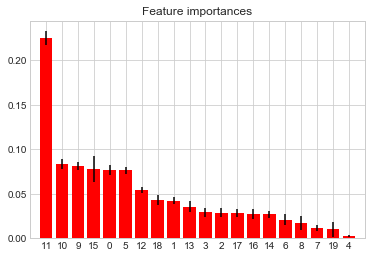

In [114]:
from sklearn.ensemble import ExtraTreesClassifier


# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_treino, y_treino)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_treino.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_treino.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_treino.shape[1]), indices)
plt.xlim([-1, X_treino.shape[1]])

In [117]:
df_treino.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'Job', 'Age', 'Balance', 'Contact'],
      dtype='object')

In [119]:
randforest1= cross_val_score(forest, X_treino,y_treino,scoring='accuracy', cv=10)

In [120]:
print('CV accuracy: %.3f +/- %.3f' %(np.mean(randforest1),np.std(randforest1)))

CV accuracy: 0.900 +/- 0.003


C:\Users\josue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.

C:\Users\josue\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



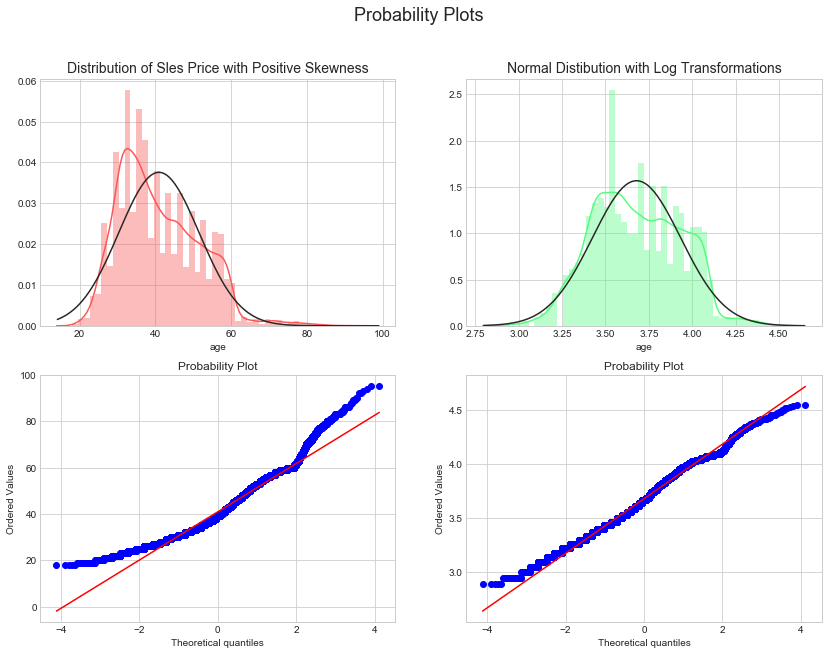

In [149]:
from scipy.stats import norm

log_style = np.log(df_treino['age']) # log of salesprice

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(14,10))
plt.suptitle('Probability Plots', fontsize=18)
ax1 = sns.distplot(df_treino['age'], color="#FA5858", ax=ax1, fit=norm)
ax1.set_title("Distribution of Sles Price with Positive Skewness", fontsize=14)
ax2 = sns.distplot(log_style, color="#58FA82",ax=ax2, fit=norm)
ax2.set_title("Normal Distibution with Log Transformations", fontsize=14)
ax3 = stats.probplot(df_treino['age'], plot=ax3)
ax4 = stats.probplot(log_style, plot=ax4)

In [175]:
df_treino.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'Job', 'Age', 'Balance', 'Contact',
       'LogAge'],
      dtype='object')

In [191]:
#df_treino['LogAge']=np.log(df_treino['age'])
y_treino=df_treino['y']
X_treino=df_treino.drop(['y','age','job','default','Contact','Balance','Age'],axis=1)

Feature ranking:
1. LogAge (0.222484)
2. day (0.182466)
3. month (0.117000)
4. campaign (0.104238)
5. poutcome (0.080476)
6. Job (0.059028)
7. pdays (0.054656)
8. previous (0.037379)
9. education (0.032903)
10. marital (0.030501)
11. contact (0.025696)
12. housing (0.022163)
13. balance (0.021296)
14. loan (0.009715)
15. duration (0.000000)


(-1, 15)

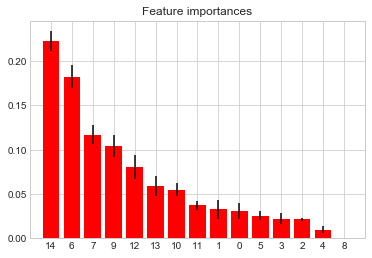

In [192]:


# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_treino, y_treino)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_treino.shape[1]):
    i=indices[f]
    print("%d. %s (%f)" % (f + 1, X_treino.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_treino.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_treino.shape[1]), indices)
plt.xlim([-1, X_treino.shape[1]])
# PdasOut  SqrtPrevious 

In [178]:
randforest1= cross_val_score(forest, X_treino,y_treino,scoring='accuracy', cv=10)

In [179]:
print('CV accuracy: %.3f +/- %.3f' %(np.mean(randforest1),np.std(randforest1)))

CV accuracy: 0.882 +/- 0.003


In [182]:
df_treino.corr()['y'].sort_values(ascending=False)

y            1.000000
poutcome     0.288712
job          0.115826
Job          0.112352
Age          0.110191
pdays        0.105742
Balance      0.093879
previous     0.092051
marital      0.043706
balance      0.038937
age          0.026684
LogAge       0.003257
default     -0.023934
day         -0.025887
month       -0.027406
education   -0.061245
loan        -0.066708
campaign    -0.072571
housing     -0.140234
contact     -0.150066
Contact     -0.153470
duration          NaN
Name: y, dtype: float64

In [186]:
X_treino.columns

Index(['marital', 'education', 'balance', 'housing', 'loan', 'contact', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'Job',
       'LogAge'],
      dtype='object')